# Load packages

In [ ]:
import pandas as pd
import numpy as np
from shapely import Point
import ee
import datetime

ee.Authenticate()
ee.Initialize()

Enter verification code:  4/1AeaYSHBGZxFt9dcQaZqRXItEeHOoRn7sM01mT-jeA3fxAiRA4bg9r-umbW8



Successfully saved authorization token.


# Download monthly temperature data 2000-2010

In [ ]:
coordinates = np.array([ 23.5544698, 40.025684])
x = float(coordinates[0])
y = float(coordinates[1])

scale = 11132
date_start = '2000-01-01'
date_end = '2010-01-01'

variables=['mean_2m_air_temperature', 'minimum_2m_air_temperature', 'maximum_2m_air_temperature']

location_point = ee.Geometry.Point(x, y)
gre= ee.ImageCollection("ECMWF/ERA5/MONTHLY").select(variables).filter(ee.Filter.date(date_start, date_end))
data= gre.getRegion(location_point, scale).getInfo()
data=pd.DataFrame(data,columns=data[0])
data = data.drop(0, axis=0)

data['mean_2m_air_temperature']=data['mean_2m_air_temperature'].astype('float')
data['mean_2m_air_temperature']=data['mean_2m_air_temperature'].apply(lambda x: x-273)
data['minimum_2m_air_temperature']=data['minimum_2m_air_temperature'].astype('float')
data['minimum_2m_air_temperature']=data['minimum_2m_air_temperature'].apply(lambda x: x-273)
data['maximum_2m_air_temperature']=data['maximum_2m_air_temperature'].astype('float')
data['maximum_2m_air_temperature']=data['maximum_2m_air_temperature'].apply(lambda x: x-273)
data['date'] = pd.to_datetime(data['id'], format='%Y%m')
data.set_index("date", inplace=True)
data.head()

,id,longitude,latitude,time,mean_2m_air_temperature,minimum_2m_air_temperature,maximum_2m_air_temperature
date,,,,,,,
2000-01-01,200001,23.550108,40.050183,946684800000,4.550476,-3.027618,14.172150
2000-02-01,200002,23.550108,40.050183,949363200000,7.940460,1.087219,16.480469
2000-03-01,200003,23.550108,40.050183,951868800000,9.482269,1.436859,18.828949
2000-04-01,200004,23.550108,40.050183,954547200000,15.215698,7.144684,22.544739
2000-05-01,200005,23.550108,40.050183,957139200000,19.333221,9.060516,27.031372


# Plot

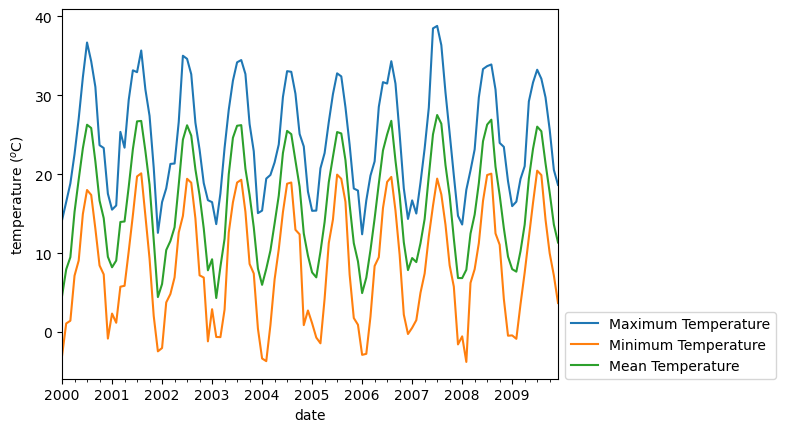

In [ ]:
import matplotlib.pyplot as plt

data.maximum_2m_air_temperature.plot(label='Maximum Temperature')
data.minimum_2m_air_temperature.plot(label='Minimum Temperature')
data.mean_2m_air_temperature.plot(label='Mean Temperature')
plt.ylabel('temperature ($^o$C)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.2))